## Clustering my top Spotify songs with k-means

1) Load libaries

In [33]:
import requests
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
warnings.filterwarnings('ignore')

2) Load data (Top_Spotify_Songs.ipynb)

In [5]:
feautres = pd.read_csv('top_spotify_features.csv')
feautres.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.693,0.572,-10.491,0.0410,0.3080,0.000405,0.0736,0.867,109.816,3.484983
1,0.459,0.500,-11.337,0.0367,0.8270,0.908000,0.3560,0.276,149.861,7.230700
2,0.811,0.553,-9.257,0.0447,0.6250,0.159000,0.2020,0.765,100.547,4.366933
3,0.525,0.717,-6.060,0.0339,0.0716,0.575000,0.1210,0.211,130.898,4.717117
4,0.665,0.797,-9.172,0.0419,0.1240,0.017300,0.0958,0.717,143.176,3.384850


In [6]:
feautres_scaled = pd.read_csv('top_spotify_features_scaled.csv')
feautres_scaled.head()

,0,1,2,3,4,5,6,7,8,9
0,0.672926,0.574127,0.538020,0.062500,0.312142,0.000422,0.056358,0.888877,0.351322,0.206656
1,0.306729,0.497278,0.487407,0.045703,0.838688,0.945833,0.417252,0.232137,0.625875,0.783263
2,0.857590,0.553848,0.611846,0.076953,0.633751,0.165625,0.220447,0.775531,0.287772,0.342422
3,0.410016,0.728893,0.803111,0.034766,0.072305,0.598958,0.116933,0.159907,0.495862,0.396328
4,0.629108,0.814281,0.616931,0.066016,0.125467,0.018021,0.084728,0.722191,0.580042,0.191242


### Clustering with KMeans

In [12]:
X_prep = feautres_scaled
X_prep.head()

,0,1,2,3,4,5,6,7,8,9
0,0.672926,0.574127,0.538020,0.062500,0.312142,0.000422,0.056358,0.888877,0.351322,0.206656
1,0.306729,0.497278,0.487407,0.045703,0.838688,0.945833,0.417252,0.232137,0.625875,0.783263
2,0.857590,0.553848,0.611846,0.076953,0.633751,0.165625,0.220447,0.775531,0.287772,0.342422
3,0.410016,0.728893,0.803111,0.034766,0.072305,0.598958,0.116933,0.159907,0.495862,0.396328
4,0.629108,0.814281,0.616931,0.066016,0.125467,0.018021,0.084728,0.722191,0.580042,0.191242


In [14]:
len(X_prep)

158

3) Building the KMeans model on the scaled Spotify data

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=3, random_state=42)

4) Predicting / assigning and check the size of the clusters

In [16]:
clusters = kmeans.predict(X_prep)
clusters

array([1, 2, 1, 2, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 1, 2, 1, 2, 1, 1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 2, 1, 2, 0, 0, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [17]:
pd.Series(clusters).value_counts().sort_index()

0    42
1    84
2    32
dtype: int64

5) Exploring the cluster assignment in the original dataset 

In [19]:
X_df = pd.DataFrame(X)
X_df["cluster"] = clusters
X_df.head()

,0,1,2,3,4,5,6,7,8,9,cluster
0,0.672926,0.574127,0.538020,0.062500,0.312142,0.000422,0.056358,0.888877,0.351322,0.206656,1
1,0.306729,0.497278,0.487407,0.045703,0.838688,0.945833,0.417252,0.232137,0.625875,0.783263,2
2,0.857590,0.553848,0.611846,0.076953,0.633751,0.165625,0.220447,0.775531,0.287772,0.342422,1
3,0.410016,0.728893,0.803111,0.034766,0.072305,0.598958,0.116933,0.159907,0.495862,0.396328,2
4,0.629108,0.814281,0.616931,0.066016,0.125467,0.018021,0.084728,0.722191,0.580042,0.191242,1


In [20]:
X_df.shape

(158, 11)

6) Checking the inertia value of the model

In [21]:
kmeans.inertia_

52.291197541612235

### Choosing the best k value for the KMeans value

7) Exploring different inertia values for different number of iterations

In [22]:
kmeans = KMeans(n_clusters=3, random_state=1234, verbose=1, n_init=1)
kmeans.fit(X_prep)
kmeans.inertia_

Initialization complete
Iteration 0, inertia 102.2856900934642
Iteration 1, inertia 52.81439259245493
Iteration 2, inertia 52.291197541612235
Converged at iteration 2: strict convergence.


52.291197541612235

8) Deciding for a k-value with using the elbow method

In [25]:
def elbow_method(X):
    K = range(1, 20,2)
    inertia = []
    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=1234)
        kmeans.fit(X)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, inertia, 'bx-')
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.show()

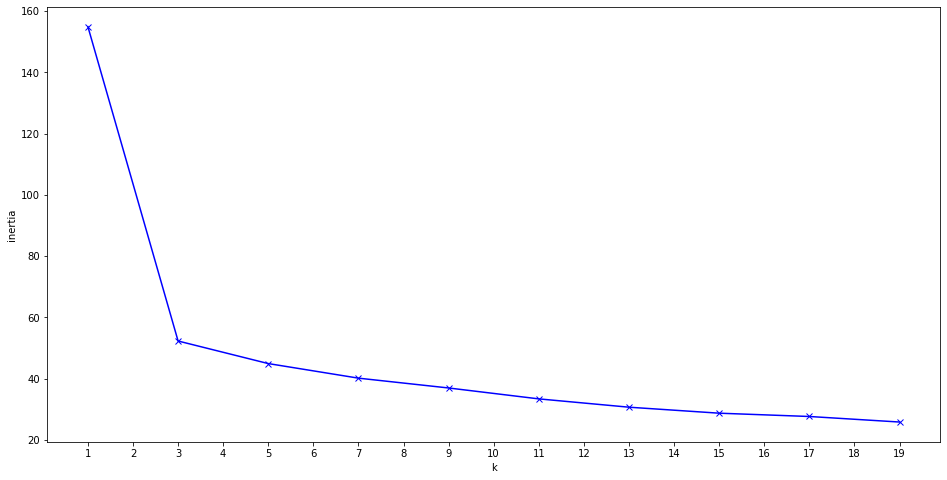

In [28]:
elbow_method(X_prep)

9) Improving the model with using k = 7 

In [29]:
kmeans = KMeans(n_clusters=7, random_state=42)
kmeans.fit(X_prep)

KMeans(n_clusters=7, random_state=42)

In [30]:
clusters = kmeans.predict(X_prep)
clusters

array([6, 2, 6, 5, 4, 6, 2, 1, 2, 5, 6, 6, 6, 2, 3, 4, 0, 2, 6, 5, 6, 2,
       5, 5, 2, 4, 6, 1, 3, 0, 5, 4, 6, 4, 5, 5, 3, 1, 3, 0, 4, 4, 2, 6,
       6, 3, 3, 3, 3, 6, 0, 4, 2, 3, 6, 2, 2, 0, 3, 0, 4, 4, 4, 0, 6, 3,
       3, 3, 0, 1, 0, 4, 6, 0, 4, 2, 1, 4, 6, 0, 0, 6, 1, 2, 1, 0, 2, 1,
       6, 0, 6, 5, 6, 2, 4, 6, 1, 6, 3, 6, 2, 6, 3, 3, 4, 3, 4, 1, 4, 6,
       0, 1, 1, 6, 3, 5, 1, 0, 1, 4, 0, 2, 3, 2, 6, 0, 1, 4, 1, 3, 6, 0,
       6, 4, 3, 5, 4, 2, 3, 3, 2, 5, 3, 0, 4, 6, 3, 4, 1, 6, 6, 6, 6, 6,
       0, 6, 6, 0])

In [31]:
pd.Series(clusters).value_counts().sort_index()

0    22
1    17
2    20
3    25
4    24
5    12
6    38
dtype: int64

In [32]:
kmeans.inertia_

40.19013224866218

In [35]:
feautres_scaled_clustered = pd.DataFrame(X)
feautres_scaled_clustered["cluster"] = clusters
feautres_scaled_clustered.head()

,0,1,2,3,4,5,6,7,8,9,cluster
0,0.672926,0.574127,0.538020,0.062500,0.312142,0.000422,0.056358,0.888877,0.351322,0.206656,6
1,0.306729,0.497278,0.487407,0.045703,0.838688,0.945833,0.417252,0.232137,0.625875,0.783263,2
2,0.857590,0.553848,0.611846,0.076953,0.633751,0.165625,0.220447,0.775531,0.287772,0.342422,6
3,0.410016,0.728893,0.803111,0.034766,0.072305,0.598958,0.116933,0.159907,0.495862,0.396328,5
4,0.629108,0.814281,0.616931,0.066016,0.125467,0.018021,0.084728,0.722191,0.580042,0.191242,4


In [38]:
feautres_scaled_clustered.shape

10) Save the clustered data as csv 

In [ ]:
feautres_scaled_clustered.to_csv('top_spotify_clustered.csv', index=False)